In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et 

In [2]:
sns.set(font_scale=1.5)
sns.set_style("white")

data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [3]:
worldBnd_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_land", "ne_110m_land.shp")
worldBnd = gpd.read_file(worldBnd_path)

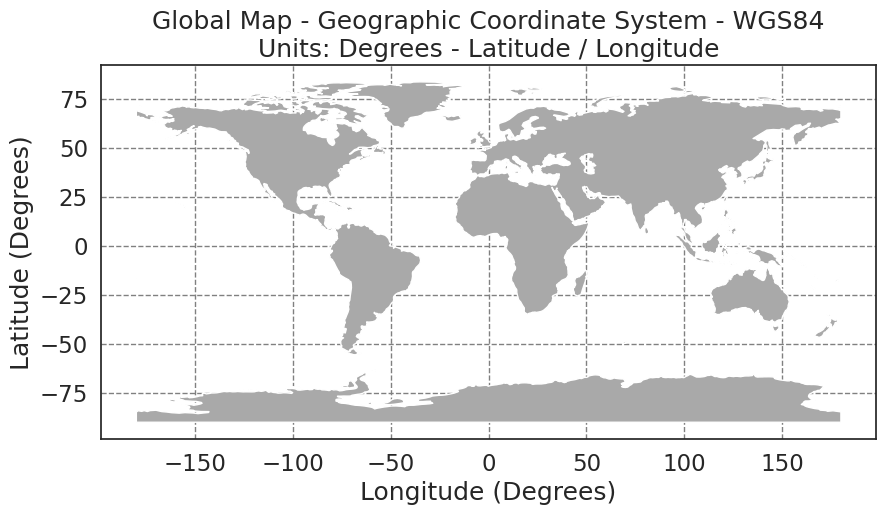

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
worldBnd.plot(color='darkgrey',
              ax=ax)

ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84\nUnits: Degrees - Latitude / Longitude")

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray',
              linestyle='dashed')
ax.xaxis.grid(color='gray',
              linestyle='dashed')

In [5]:
add_points = np.array([[-105.2519, 40.0274],
                       [10.75, 59.95],
                       [2.9833, 39.6167]])

city_locs = [Point(xy) for xy in add_points]
city_locs

[<POINT (-105.252 40.027)>, <POINT (10.75 59.95)>, <POINT (2.983 39.617)>]

In [6]:
city_locs = gpd.GeoDataFrame(city_locs,
                             columns=['geometry'],
                             crs=worldBnd.crs)

city_locs.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


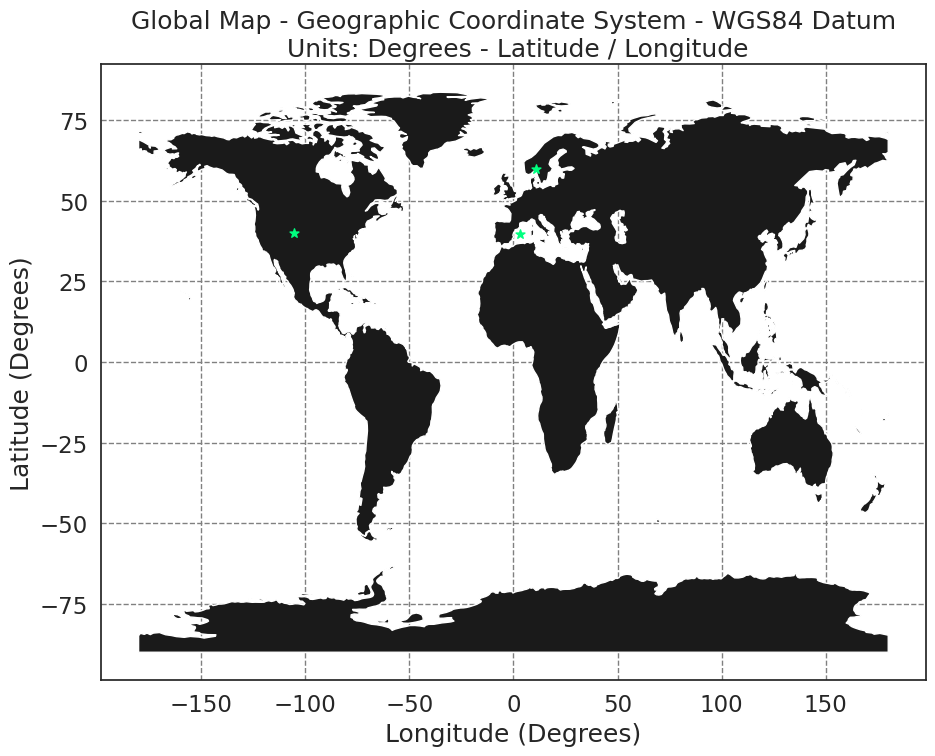

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

worldBnd.plot(figsize=(10, 5),
              color='k',
              ax=ax)


city_locs.plot(ax=ax,
               color='springgreen', 
               marker='*',
               markersize=45)


ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

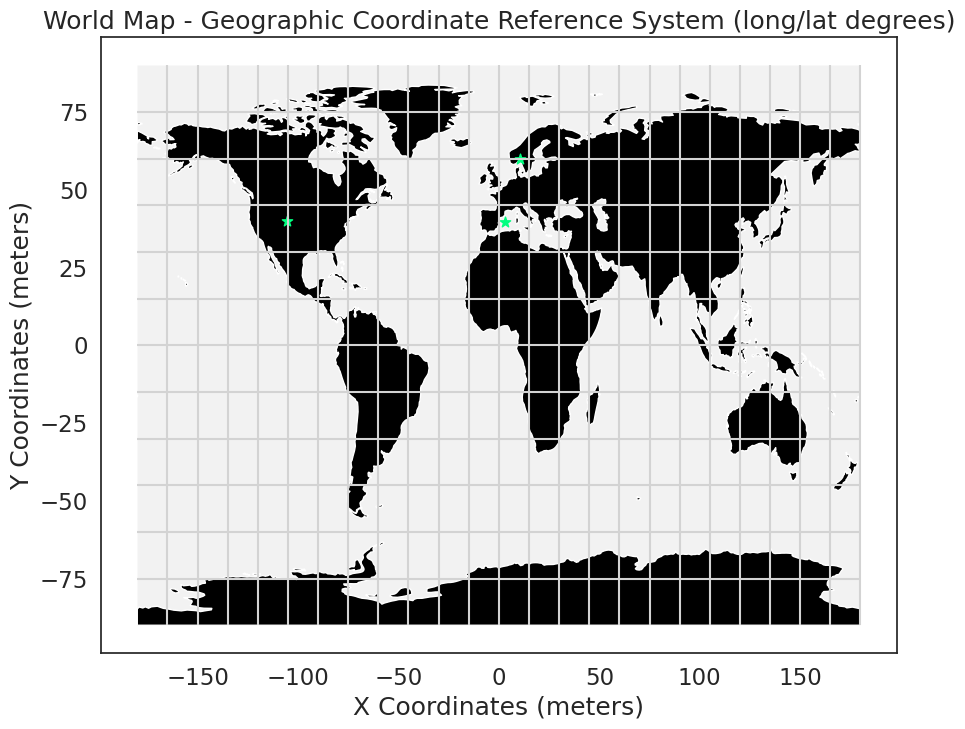

In [8]:
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBnd.plot(ax=ax, color='black')

city_locs.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')

ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");


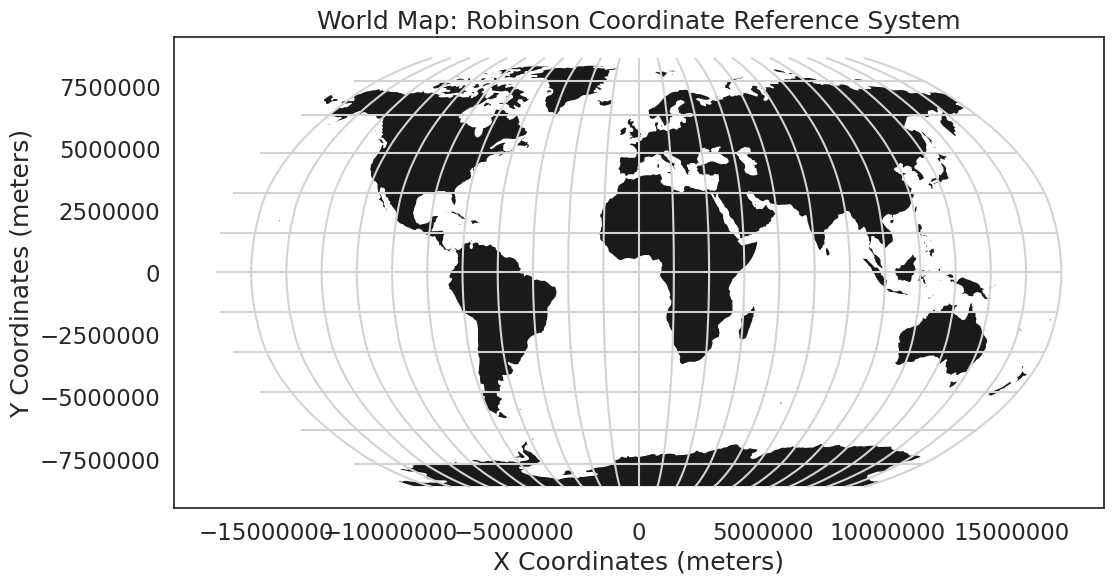

In [9]:
worldBnd_robin = worldBnd.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

fig, ax = plt.subplots(figsize=(12, 8))

worldBnd_robin.plot(ax=ax,
                    color='k')

graticule_robin.plot(ax=ax,
                     color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

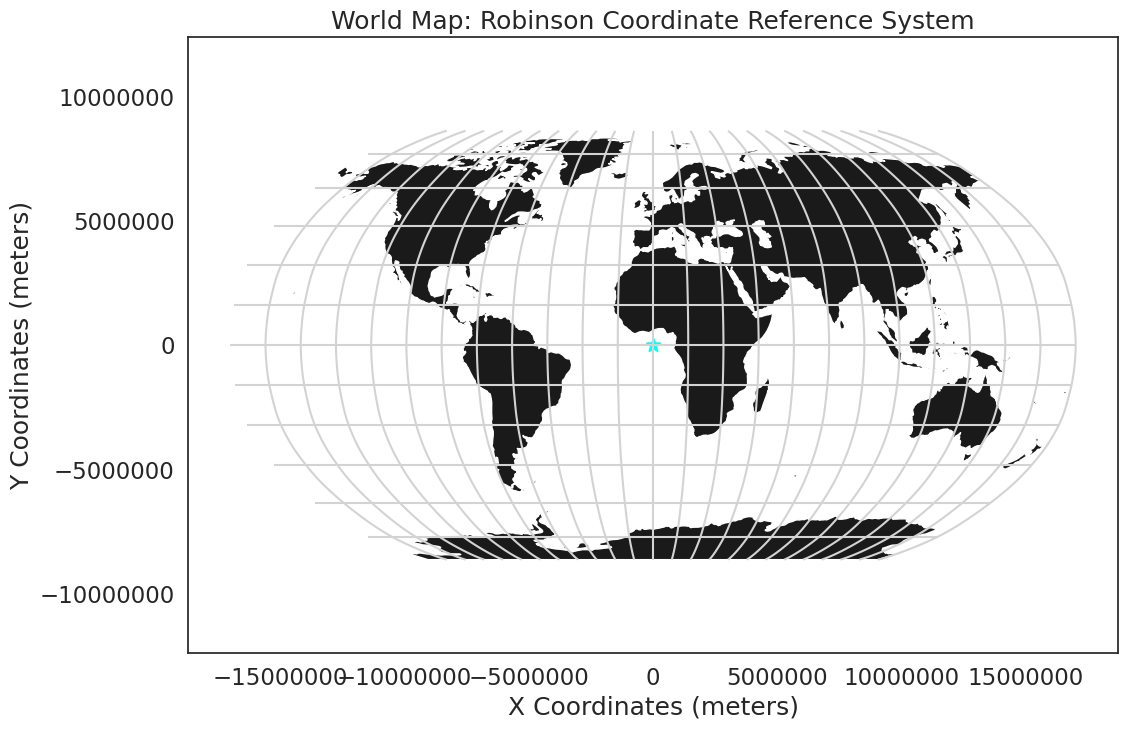

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))

worldBnd_robin.plot(ax=ax,
                    color='k')

graticule_robin.plot(ax=ax,
                     color='lightgrey')

city_locs.plot(ax=ax,
               marker='*',
               color='cyan',
               markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

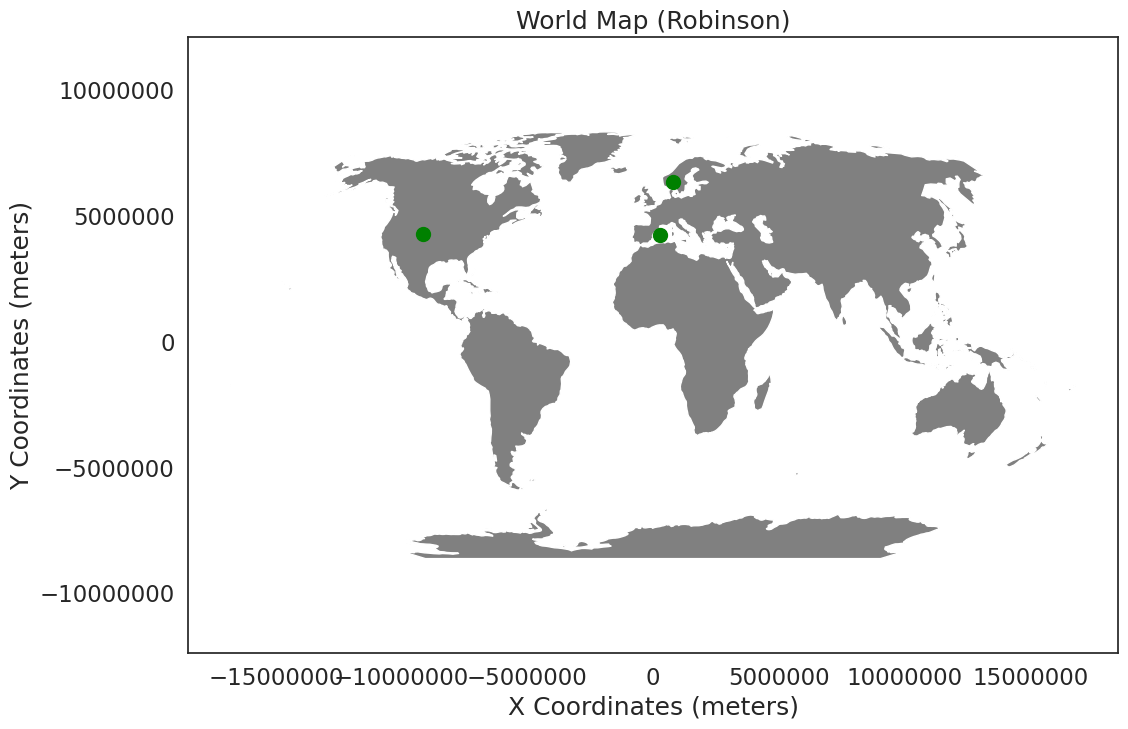

In [13]:
city_locs_robin = city_locs.to_crs(worldBnd_robin.crs)

fig, ax = plt.subplots(1,1, figsize=(12, 8))

worldBnd_robin.plot(ax=ax,
                    color='Grey')

ax.set(title="World Map (Robinson)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

city_locs_robin.plot(ax=ax,
               color='Green',
               markersize=100)

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

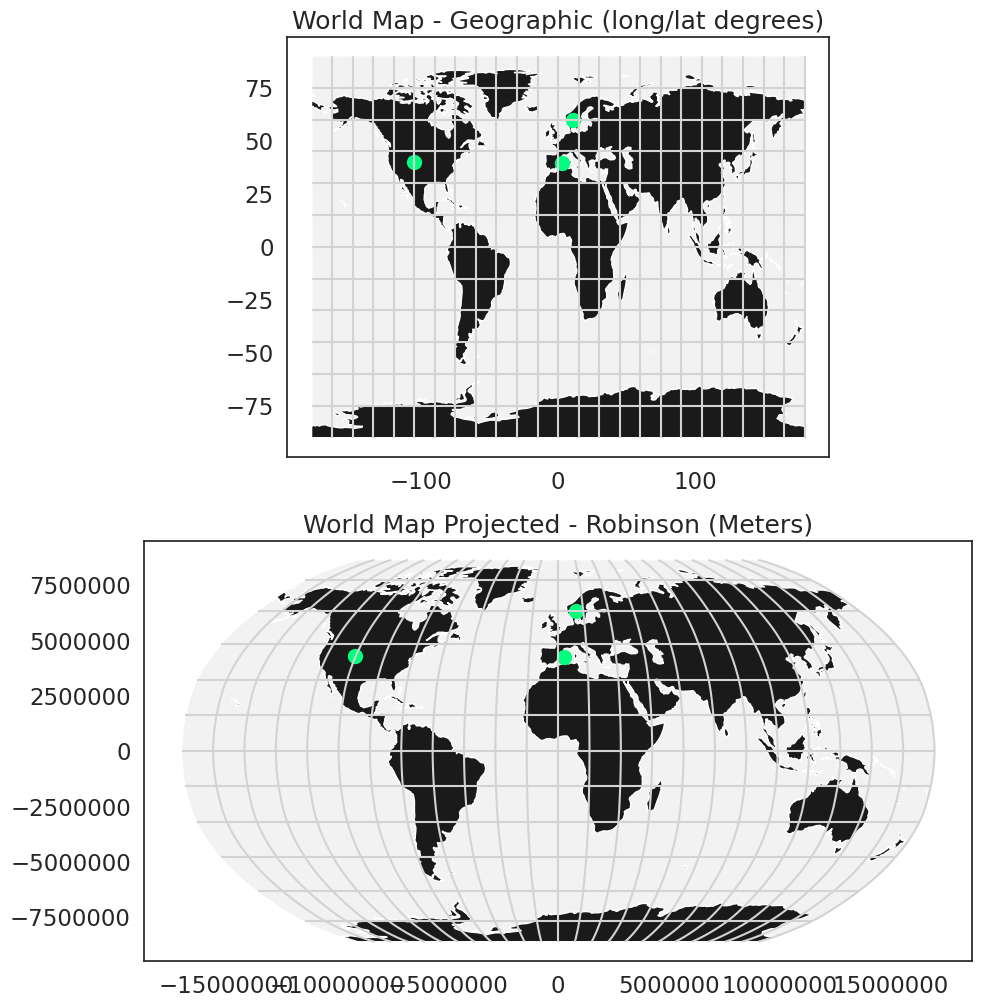

In [14]:
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robin = bbox.to_crs('+proj=robin')

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBnd.plot(ax=ax0,
              color='k')

city_locs.plot(ax=ax0,
               markersize=100,
               color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")

# Second plot
bbox_robin.plot(ax=ax1,
                alpha=.1,
                color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBnd_robin.plot(ax=ax1,
                    color='k')

city_locs_robin.plot(ax=ax1,
                     markersize=100,
                     color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
